In [72]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plb

from numpy import ma
from matplotlib import pyplot as plt

In [23]:
env = pd.read_csv('snake-env-20180619-164009.csv')

In [24]:
env.head()

,action_counter_0,action_counter_1,action_counter_2,fruits_eaten,mean_reward,sum_episode_rewards,termination_reason,timesteps_survived
0,4,0,2,0,-0.166667,-1,hit_wall,6
1,3,6,5,1,0.214286,3,hit_wall,14
2,8,9,11,0,-0.035714,-1,hit_wall,28
3,10,6,5,0,-0.047619,-1,hit_wall,21
4,2,4,3,0,-0.111111,-1,hit_wall,9


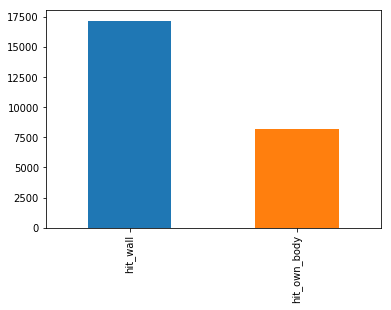

In [25]:
env['termination_reason'].value_counts().plot(kind='bar')

Text(0,0.5,'Mean reward')

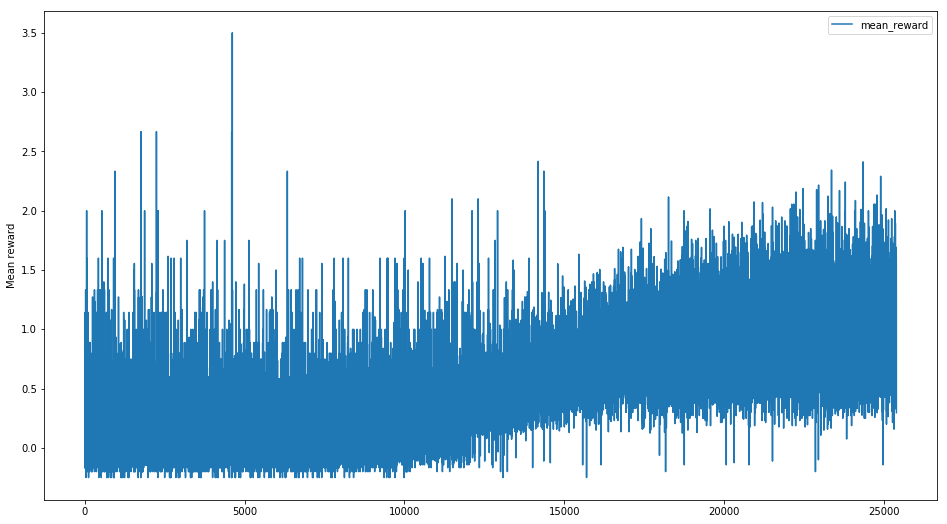

In [26]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(env['mean_reward'], label='mean_reward')

ax.legend(loc='best')
ax.set_ylabel('Mean reward')

Text(0,0.5,'fruits eaten')

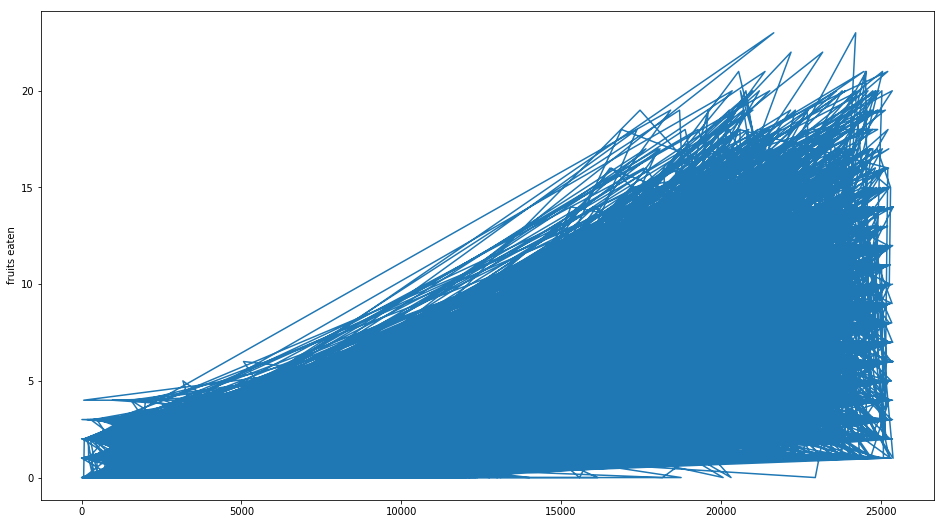

In [90]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(env['fruits_eaten'].(10000), label='fruits_eaten')

ax.set_ylabel('fruits eaten')

In [22]:
env['fruits_eaten'].describe()

count    30000.000000
mean         0.303267
std          0.579402
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: fruits_eaten, dtype: float64

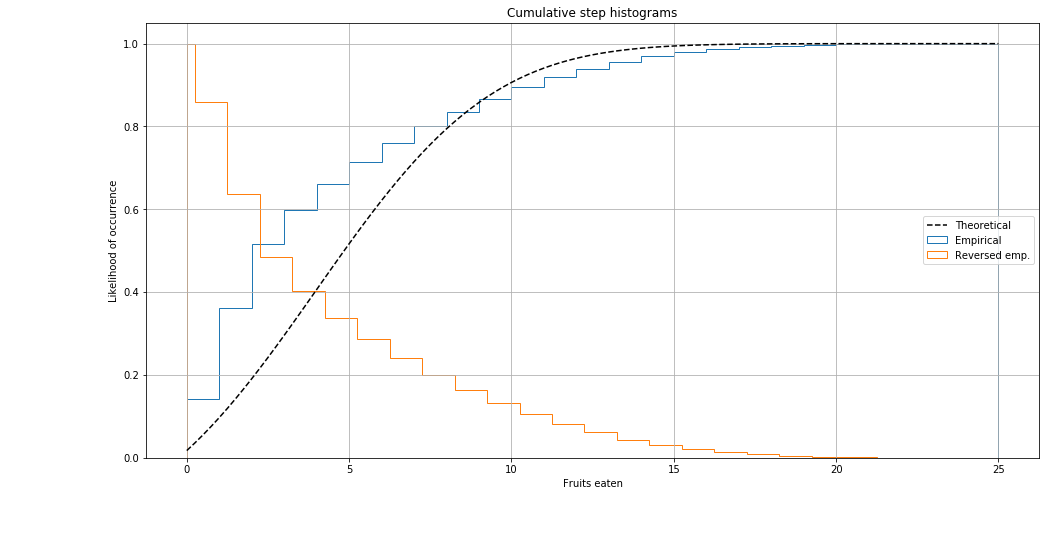

In [50]:
n_bins = 100
sigma = env['fruits_eaten'].std()
mu = env['fruits_eaten'].mean()
fig, ax = plt.subplots(figsize=(16, 8))
n, bins, patches = ax.hist(env['fruits_eaten'], n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

# Overlay a reversed cumulative histogram.
ax.hist(env['fruits_eaten'], bins=bins, density=True, histtype='step', cumulative=-1,
        label='Reversed emp.')

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.annotate('50% of the customers (1,12000) have up to 55 trades', (5, 5))
ax.set_xlabel('Fruits eaten')
ax.set_ylabel('Likelihood of occurrence')

plt.show()

In [43]:
last_env = pd.read_csv('snake-env-20180619-164009.csv')

In [44]:
last_env.head()

,action_counter_0,action_counter_1,action_counter_2,fruits_eaten,mean_reward,sum_episode_rewards,termination_reason,timesteps_survived
0,4,0,2,0,-0.166667,-1,hit_wall,6
1,3,6,5,1,0.214286,3,hit_wall,14
2,8,9,11,0,-0.035714,-1,hit_wall,28
3,10,6,5,0,-0.047619,-1,hit_wall,21
4,2,4,3,0,-0.111111,-1,hit_wall,9


Text(0,0.5,'fruits eaten')

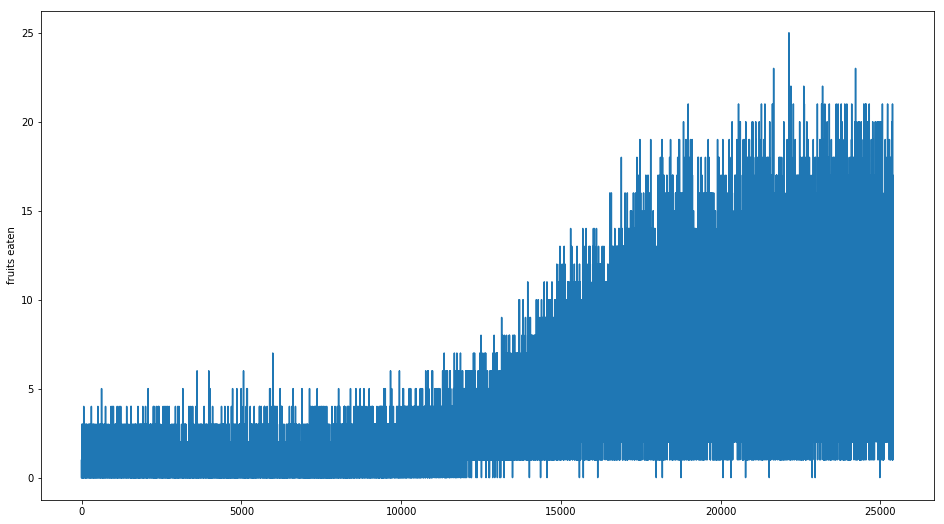

In [75]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(env['fruits_eaten'], label='fruits_eaten')

ax.set_ylabel('fruits eaten')

Text(0,0.5,'fruits eaten')

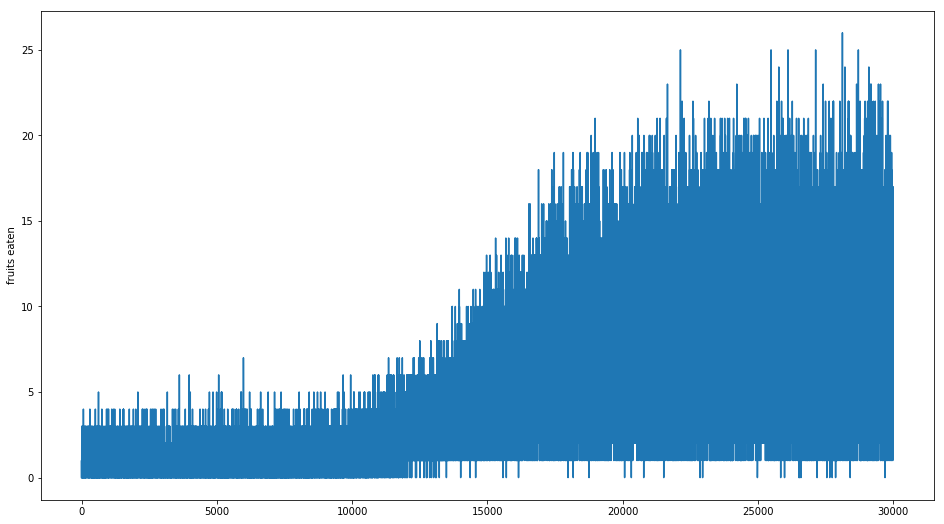

In [73]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(last_env['fruits_eaten'], label='fruits_eaten')

ax.set_ylabel('fruits eaten')

Text(0,0.5,'Average fruits eaten')

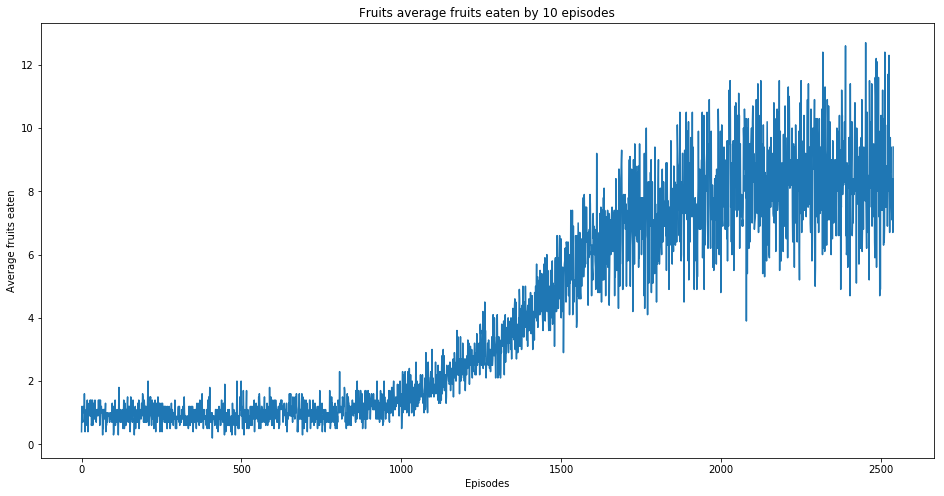

In [126]:
groups_of_thousands = pd.Series(np.repeat(range(int(len(env['fruits_eaten'])/10)), 10))
grouped = env['fruits_eaten'].groupby(groups_of_thousands)

#aggregate
ax = grouped.agg('mean').plot(x='Episodes', y='Avg fruits eaten', figsize=(16,8))
ax.set_title("Fruits average fruits eaten by 10 episodes")
ax.set_xlabel("Episodes")
ax.set_ylabel("Average fruits eaten")

0         0
1         1
2         0
3         0
4         0
1000      1
1001      0
1002      1
1003      1
1004      0
2000      1
2001      1
2002      1
2003      4
2004      1
3000      1
3001      2
3002      0
3003      2
3004      0
4000      0
4001      3
4002      0
4003      0
4004      1
5000      1
5001      0
5002      1
5003      1
5004      1
         ..
20000     8
20001     2
20002    10
20003    14
20004     2
21000    10
21001     7
21002     7
21003    20
21004     8
22000    11
22001     7
22002     9
22003    12
22004    16
23000     8
23001    10
23002    13
23003    14
23004    13
24000     1
24001    12
24002    13
24003    13
24004     5
25000     8
25001     8
25002     7
25003    17
25004    13
Name: fruits_eaten, Length: 130, dtype: int64

In [57]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

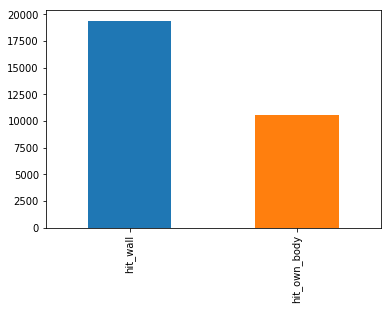

In [74]:
last_env['termination_reason'].value_counts().plot(kind='bar')

In [76]:
env.describe().T

,count,mean,std,min,25%,50%,75%,max
action_counter_0,25398.0,18.046618,18.123433,0.00,5.000000,11.0,26.000000,133.0
action_counter_1,25398.0,11.447279,9.800103,0.00,4.000000,9.0,16.000000,79.0
action_counter_2,25398.0,10.910269,9.139602,0.00,4.000000,8.0,16.000000,67.0
fruits_eaten,25398.0,4.116978,4.252844,0.00,1.000000,2.0,6.000000,25.0
mean_reward,25398.0,0.540059,0.455068,-0.25,0.195122,0.5,0.863636,3.5
sum_episode_rewards,25398.0,30.927160,45.616830,-1.00,3.000000,8.0,38.000000,399.0
timesteps_survived,25398.0,40.404166,35.463619,3.00,14.000000,28.0,57.000000,238.0


In [78]:
last_env.describe().T

,count,mean,std,min,25%,50%,75%,max
action_counter_0,30000.0,20.015367,19.226334,0.00,5.000000,13.000000,29.000000,134.0
action_counter_1,30000.0,12.473500,10.439428,0.00,4.000000,10.000000,18.000000,81.0
action_counter_2,30000.0,11.888567,9.740214,0.00,4.000000,9.000000,17.000000,67.0
fruits_eaten,30000.0,4.816833,4.684451,0.00,1.000000,3.000000,8.000000,26.0
mean_reward,30000.0,0.617747,0.482596,-0.25,0.247059,0.583333,0.967213,3.5
sum_episode_rewards,30000.0,38.431533,52.801245,-1.00,3.000000,14.000000,59.000000,428.0
timesteps_survived,30000.0,44.377433,37.813040,3.00,15.000000,32.000000,64.000000,269.0


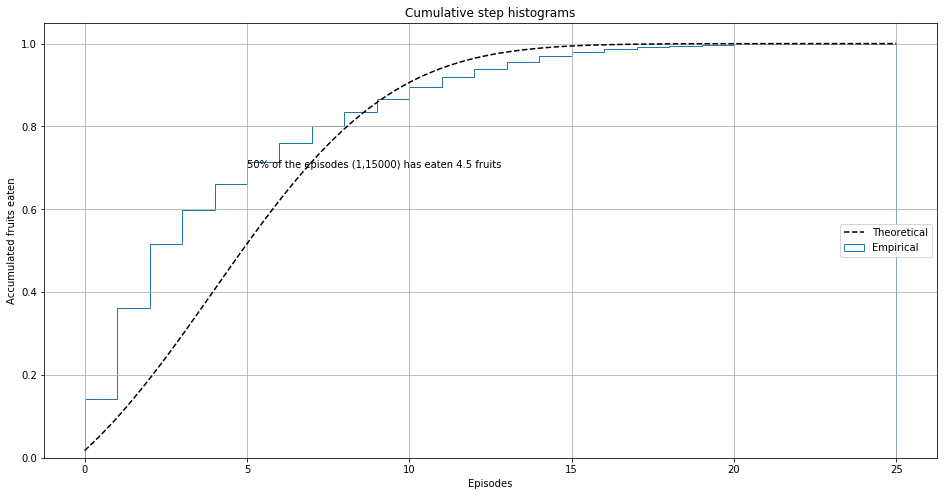

In [99]:
n_bins = 100
sigma = env['fruits_eaten'].std()
mu = env['fruits_eaten'].mean()
sigma_last = last_env['fruits_eaten'].std()
mu_last = last_env['fruits_eaten'].mean()
fig, ax = plt.subplots(figsize=(16, 8))
n, bins, patches = ax.hist(env['fruits_eaten'], n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')


# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.annotate('50% of the episodes (1,15000) has eaten 4.5 fruits', (5, 0.7))
ax.set_xlabel('Episodes')
ax.set_ylabel('Accumulated fruits eaten')

plt.show()

In [93]:
env.describe().T

,count,mean,std,min,25%,50%,75%,max
action_counter_0,25398.0,18.046618,18.123433,0.00,5.000000,11.0,26.000000,133.0
action_counter_1,25398.0,11.447279,9.800103,0.00,4.000000,9.0,16.000000,79.0
action_counter_2,25398.0,10.910269,9.139602,0.00,4.000000,8.0,16.000000,67.0
fruits_eaten,25398.0,4.116978,4.252844,0.00,1.000000,2.0,6.000000,25.0
mean_reward,25398.0,0.540059,0.455068,-0.25,0.195122,0.5,0.863636,3.5
sum_episode_rewards,25398.0,30.927160,45.616830,-1.00,3.000000,8.0,38.000000,399.0
timesteps_survived,25398.0,40.404166,35.463619,3.00,14.000000,28.0,57.000000,238.0


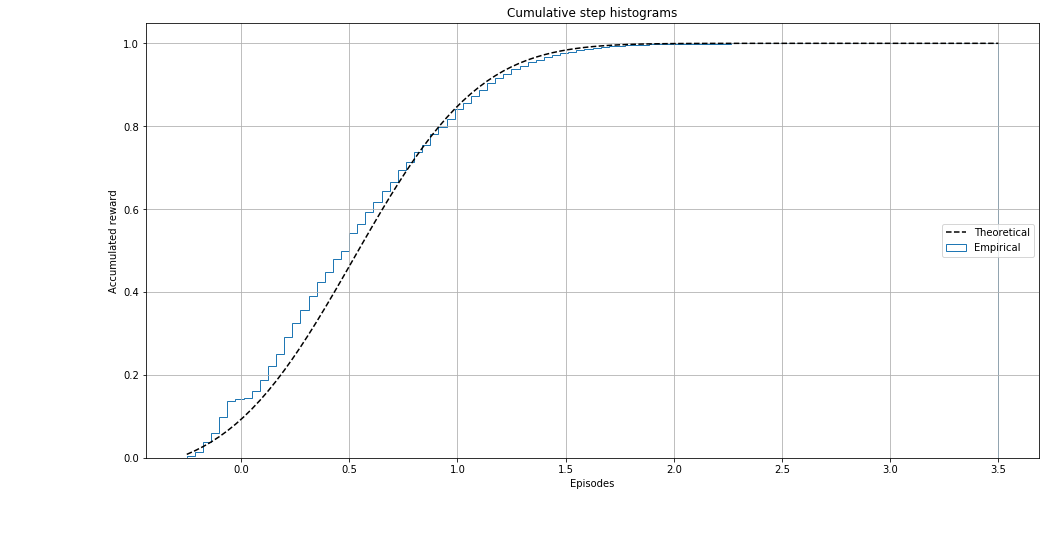

In [104]:
n_bins = 100
sigma = env['mean_reward'].std()
mu = env['mean_reward'].mean()
fig, ax = plt.subplots(figsize=(16, 8))
n, bins, patches = ax.hist(env['mean_reward'], n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')


# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.annotate('50% of the episodes (1,15000) has eaten 4.5 fruits', (5, 0.7))
ax.set_xlabel('Episodes')
ax.set_ylabel('Accumulated reward')

plt.show()